# Step-1: Generate summary statistics (mean, median, std, etc.)

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic=pd.read_csv(r"C:\Users\venka\Downloads\Titanic-Dataset (1).csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step-2: Create histograms and boxplots for numeric features

In [4]:
titanic['Age'].dtype

dtype('float64')

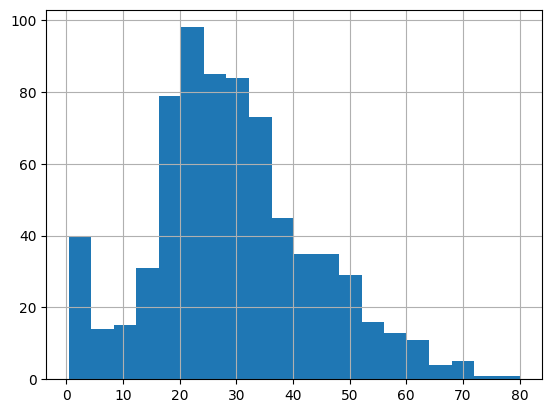

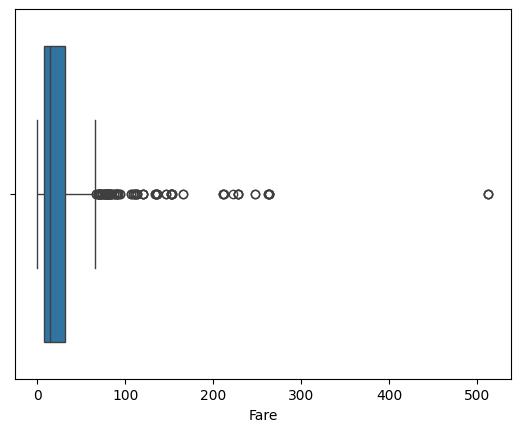

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
titanic['Age'].hist(bins=20)
plt.show()

# Boxplot
sns.boxplot(x='Fare', data=titanic)
plt.show()


# Step-3: Use pairplot/correlation matrix for feature relationships.


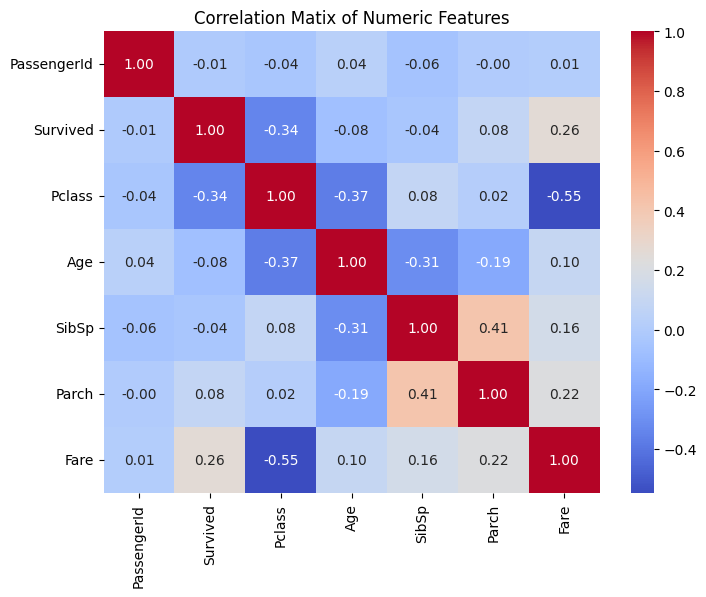

In [8]:
# Select only numerics columns
num_cols=titanic.select_dtypes(include=['int64','float64'])

#Correlation matrix
corr_matrix=num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matix of Numeric Features')
plt.show()
            

# Step-4: Identify patterns, trends, or anomalies in the data.

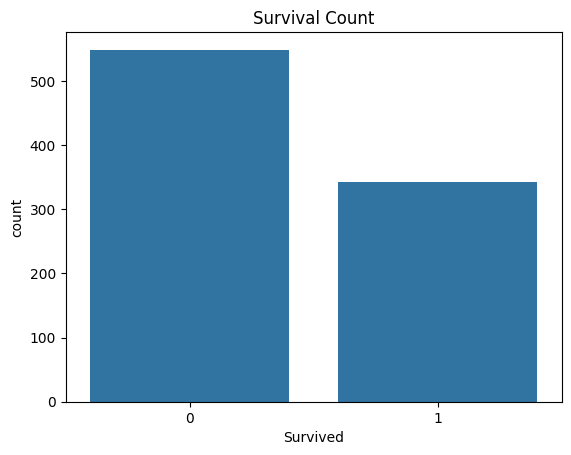

In [10]:
# 1. Survival count
sns.countplot(data=titanic,x='Survived')
plt.title('Survival Count')
plt.show()

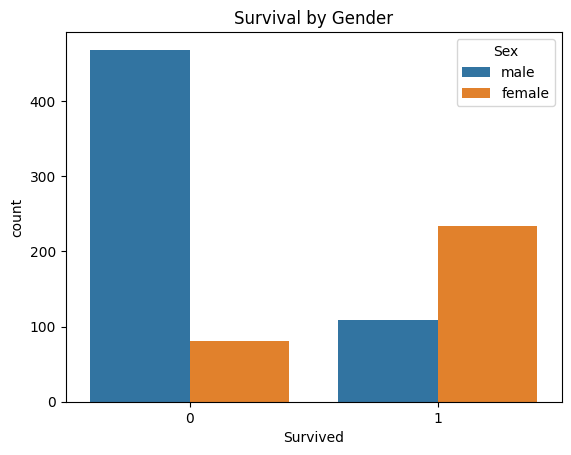

In [14]:
# 2. Survival by Gender
sns.countplot(data=titanic,x='Survived',hue='Sex')
plt.title('Survival by Gender')
plt.show()

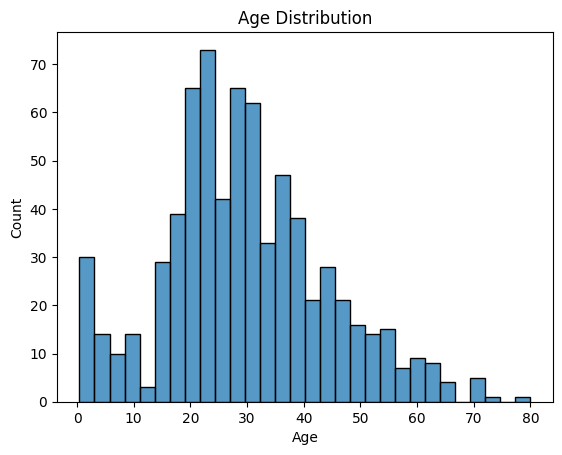

In [15]:
# 3. Age distribution
sns.histplot(data=titanic['Age'].dropna(),bins=30)
plt.title('Age Distribution')
plt.show()

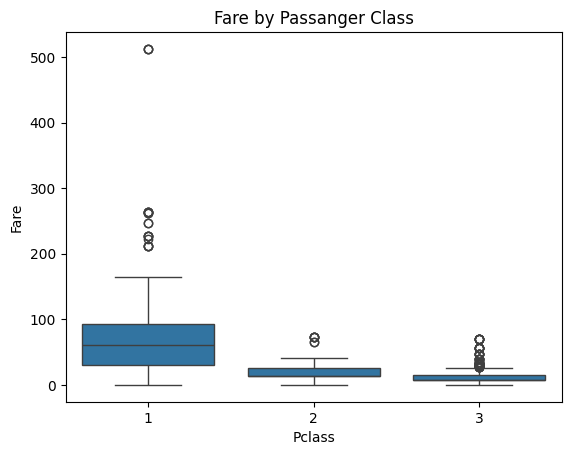

In [16]:
# 4. Fare Distribution
sns.boxplot(x='Pclass',y='Fare',data=titanic)
plt.title("Fare by Passanger Class")
plt.show()

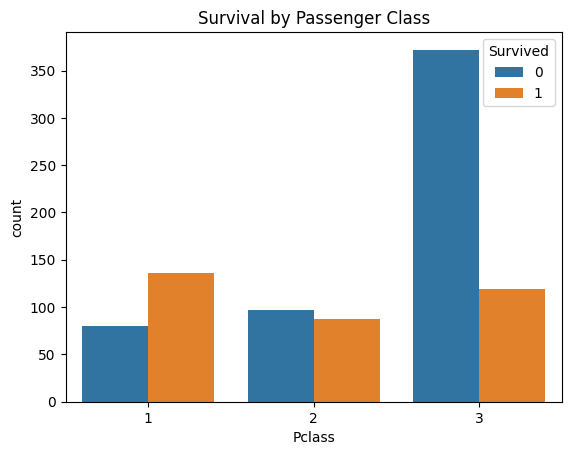

In [17]:
# 5. Survival by class
sns.countplot(data=titanic,x='Pclass',hue='Survived')
plt.title("Survival by Passenger Class")
plt.show() 

# Step-5: Make basic feature-level inferences from visuals


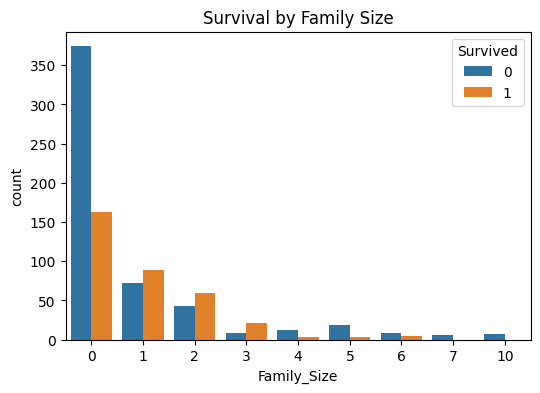

In [20]:
# Survival by Family (SibSp + Parch)
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch']
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Family_Size', hue='Survived')
plt.title("Survival by Family Size")
plt.show()